### Demonstration of an evaluation based on the MCTSAgent

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import chess
import chess.variant
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../../../')
from DeepCrazyhouse.src.runtime.color_logger import enable_color_logging
from DeepCrazyhouse.src.domain.agent.neural_net_api import NeuralNetAPI
from DeepCrazyhouse.src.domain.agent.player.mcts_agent import MCTSAgent
from DeepCrazyhouse.src.domain.agent.player.raw_net_agent import RawNetAgent
from DeepCrazyhouse.src.domain.crazyhouse.game_state import GameState
from DeepCrazyhouse.src.runtime.color_logger import enable_color_logging
from time import time
%matplotlib inline
plt.style.use('seaborn-whitegrid')
enable_color_logging()

In [4]:
batch_size = 8 #32 #8
threads = 16

In [5]:
nets = []
for idx in range(2):
    nets.append(NeuralNetAPI(ctx='gpu', batch_size=batch_size))

self.symbol_path: /media/queensgambit/5C483A84483A5CC8/Deep_Learning/data/lichess/Crazyhouse/model/orig_resnet_4_value_8_policy/symbol/model-1.21119-0.600-symbol.json
self.params_path: /media/queensgambit/5C483A84483A5CC8/Deep_Learning/data/lichess/Crazyhouse/model/orig_resnet_4_value_8_policy/params/model-1.21119-0.600-0222.params
self.symbol_path: /media/queensgambit/5C483A84483A5CC8/Deep_Learning/data/lichess/Crazyhouse/model/orig_resnet_4_value_8_policy/symbol/model-1.21119-0.600-symbol.json
self.params_path: /media/queensgambit/5C483A84483A5CC8/Deep_Learning/data/lichess/Crazyhouse/model/orig_resnet_4_value_8_policy/params/model-1.21119-0.600-0222.params


In [6]:
raw_agent = RawNetAgent(nets[0])

In [7]:
mcts_agent = MCTSAgent(nets, threads=threads,
                       playouts_empty_pockets=4096*5, playouts_filled_pockets=4096*5,
                       #playouts_empty_pockets=800, playouts_filled_pockets=800,
                 cpuct=2.5, dirichlet_epsilon=.25, dirichlet_alpha=0.2, batch_size=batch_size, q_value_weight=0.7,
                 max_search_depth=40, temperature=.07, virtual_loss=6, verbose=True, temperature_moves=0,
                 min_movetime=60000*1, check_mate_in_one=False, use_oscillating_cpuct=False, use_pruning=False, opening_guard_moves=0)

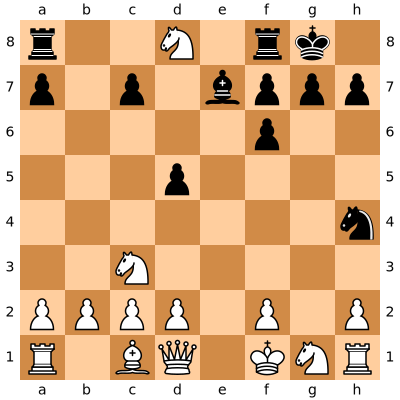

In [8]:
board = chess.variant.CrazyhouseBoard()

#board.push_uci('e2e4')
#board.push_uci('e7e6')

fen = 'rnbqkb1r/ppp1pppp/5n2/3P4/8/8/PPPP1PPP/RNBQKBNR/P w KQkq - 1 3'
fen = 'rnb2rk1/p3bppp/2p5/3p2P1/4n3/8/PPPPBPPP/RNB1K1NR/QPPq w KQ - 0 11'
#fen = 'r1b1kbnr/ppp1pppp/2n5/3q4/3P4/8/PPP1NPPP/RNBQKB1R/Pp b KQkq - 1 4'
#fen = 'r1b1k2r/ppp2ppp/2n5/3np3/3P4/2PBP3/PpPB1PPP/1Q2K1NR/QNrb b Kkq - 27 14'
#fen = 'r1bb4/ppp2pkp/5npb/4p3/4P3/2N5/PPP1BPPP/3RK2R/QNRqpnp w K - 3 16'
#fen = '3R1b2/1bP1kp2/3Npn1p/3p4/5p2/5N1b/PPP2P1P/5Q1K/RPRPRQPnpbp b - - 4 36'
#fen = 'r3k1nr/ppp2ppp/2n5/8/q7/Pp6/1PnRN1PP/1K3B1R/BBQBppppp b kq - 3 27'
#fen = 'rn2N2k/pp5p/3pp1pN/3p4/3q1P2/3P1p2/PP3PPP/RN3RK1/Qrbbpbb b - - 0 27'
#fen = 'rn2N2k/pp5p/3pp1pN/3p4/3q1P2/3P1p2/PP3PPP/RN3RK1/Qrbbpbb b - - 0 30'
#fen = 'rn2N2k/pp5p/3pp1pN/3p4/5P2/3P1p2/PP3RPP/RN4K1/QQprbbpbb b - - 1 30'

# Test positions
#fen = '3R1b2/1bP1kp2/3Npn1p/3p4/5p2/5N1b/PPP1QP1P/3R1RK1/QPpprnpbp b - - 0 29'
fen = 'rn2N2k/pp5p/3pp1pN/3p4/3q1P2/3P1p2/PP3PPP/RN3RK1[Qrbbpbb] b - - 3 30'
#fen = 'q6r/p2P1pkp/1p1b1n2/2p2B2/8/6n1/PPP2KPp/R4R2/PNNRPBPbqpp w - - 2 26'
#fen ='2kr1b2/1bp2p1p/p3pP1p/1p5Q/5B2/3B1p2/PPP2PrP/R4R1K/QNpnnnp w - - 0 18'
#fen = 'q6r/p2P1pkp/1p1b1n2/2p2B2/8/6n1/PPP2KPp/R4R2/PNNRPBPbqpp w - - 50 26'
#fen = 'r4r1k/ppp1q1bp/4Ppp1/1P6/2NN3P/2BPPb2/P2PNPpR/R3K3/PBQn b Q - 2 34'
#fen = 'r1bq1b1r/ppp1kPpp/4Pn2/n2Pp3/2B4n/3P4/PPP2PPP/RNBQK2R/ w KQ - 0 10'

#fen = 'r4rk1/ppp2pbp/1nnp4/6P1/4Pp2/1P1P1N1P/2P2PPK/R2Q1R2/QNbbpb w - - 0 23'
#fen = 'r4rk1/ppp2pPp/1nn3nP/4b3/5p1B/1P1P3P/2P2PPK/R2Q1R2/Qbpnpb w - - 2 37'
#fen = 'r4rk1/ppp2pPp/1nn2bnP/4b3/6Q1/1P1P1pBP/2P2PPK/R4R2/Qpnpb w - - 2 39'
#fen = 'B2q1r1k/p3pp2/6pb/3pB2p/3N4/B2NP1pn/P1PP2P1/R2Q3K/PPrnprp b - - 0 28'
#fen = 'r1bq3r/p1ppbkpp/2p2n2/8/4P3/8/PPP2PPP/RNBQK2R/NPPnbp w KQ - 2 8'
#fen = 'r1bqk2r/1pp1nppp/1p3p2/3p4/3P3n/1B6/PP2BPPP/RNBQ1KNR/Pp b kq - 0 14'
#fen = '3qk2r/1pp1nppp/1p3p2/3p4/3P3n/1B5P/RP2BPpP/1NBQ2KR/RBPPn b k - 2 18'
#fen = 'r2q2kb/ppp4p/1nn1P1p1/4p1N1/2Pb4/1P1P2NP/2PB1rP1/Q4RK1/RPppb w - - 0 27'
#fen = 'r1bqk1r1/ppppbppp/5n2/4nN2/2B1P3/2N5/PPP2PPP/R1BQK2R/Pp w KQq - 2 8'
#fen = 'r2q1rk1/pP2ppbp/2p3pb/2Q5/4Pp2/2NB1NpP/PPP3P1/R4RK1/NBpn b - - 0 19'
#fen = 'r1bqkb1r/ppp1pppp/2n2n2/3p4/3P4/2N2N2/PPP1PPPP/R1BQKB1R/ w KQkq - 6 4'
#fen = 'r1bq1b2/2p1pk2/p1p2npp/8/3P4/P4N2/1PP2PPP/R1B1K2R/RPNPbnqp w KQ - 26 0'
#fen = 'r5k1/ppp2Rp1/1bnp1qP1/2b1pP2/8/3P1N1p/PPP2PPP/R2Q1R1K/Nbbn w - - 42 0'
#fen = 'r2q3r/ppp1k1pp/2npN3/2b1p3/4P1n1/2NP4/PPP2PPP/R1B2RK1/BPqb w - - 0 11'
#fen = 'r2qk1r1/ppp2p2/2np3p/2bBp1p1/4P1bn/3P1NB1/PPP2PPP/R2Q1RK1/N w q - 0 12'
#fen = 'r2k3r/pppb2pp/5b2/6N1/4P2n/3Q4/PPP2PPP/R1B1K2R/PPNPqbnp w KQ - 0 14'
#fen = 'r1bqk2r/ppp1bppp/5n2/3p4/2BQP3/2N5/PPP2PPP/R1B1K2R/NPnp w KQkq - 0 8'
#fen = '3r1rk1/p1p1npp1/2pp3p/2b1p1NQ/4P3/3P1P2/PPP2P1P/R2Q1RK1/BBnbn w - - 2 18'
#fen = 'r2q1rk1/p1p1bpp1/2pp1n1p/2b1pN2/4P1nB/3P1N2/PPP2PPP/R2Q1RK1/B w - - 0 13'
#fen = 'r1bq1rk1/ppp2pp1/2np1n1p/2b1p1B1/2B1P3/2NP1N2/PPP2PPP/R2Q1RK1/ w - - 14 8'
#fen = 'r1bqk1r1/pppp1ppp/2n2n2/5N2/1bB1P3/2N4p/PPP2PPP/R1BQK1R1/P w Qq - 2 9'
#fen = 'r1bqk1r1/ppp2ppp/2n2n2/3p1N2/1bB1P3/2N4P/PPP2P1P/R1BQK1R1/PP w Qq - 0 10'
#fen = 'r1bqk2r/ppppbppp/2n2n2/8/2BNP3/8/PPP2PPP/RNBQK2R/Pp w KQkq - 1 6'
#fen = 'r1b1k1r1/pp1p1ppp/1q1B1nn1/1B3N2/4P3/2P1p3/P1P1QPpP/R3K1R1/BPPn w Qq - 34 18'
#fen = 'r1bqk3/ppp1bprp/3p1n2/5PP1/4P2n/2NQ4/PPP2PBP/R1B1K2R/Npp w KQq - 1 13'
#fen = 'r1bqk1nr/pppp1ppp/5b2/4nNP1/2B1P3/7p/PPP2PPP/RNBQK2R/ w KQkq - 1 8'
#fen = 'r1b1k1nr/ppp2ppp/5q2/3pnN2/4P3/7p/PPP2PPP/RNBQKB1R/Bp w KQkq - 1 10'
#fen = 'r3k2r/ppp2ppp/5n2/3pnb2/4P3/7p/PPP2PPP/RNBQKB1R/Qbnp w KQkq - 22 12'
#fen = 'rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR/ w KQkq - 2 2'
#fen = 'r1bq1rk1/ppp2ppp/2np4/2bBp3/4P1n1/3P1N2/PPP1QPPP/R1B2RK1/N w - - 2 10'
#fen = 'r1bq1rk1/pppp1ppp/2n2n2/2b1p3/2B1P3/2NP1N2/PPP2PPP/R1BQ1RK1/ w - - 12 7'
#fen = 'r1bq1rk1/pppp1ppp/2n5/2bBp3/4P1n1/3P1N2/PPP2PPP/R1BQ1RK1/N w - - 2 9'
#fen = 'r1bqk1r1/ppppbppp/5n2/1B2nN2/4P3/2N4p/PPP2PPP/R1BQK2R/P w KQq - 16 9'
#fen = 'r1bqkb1r/ppp2ppp/3p4/6P1/4n3/2N5/PPP2P1P/R1BQK1Rb/NPNpp w Qkq - 2 13'

fen = 'r1b1kb1r/p1p1pppp/2N5/1B2N3/2pPn3/2PKB3/P1PP2p1/3q1rR1/QPPNP w - - 0 25' # mate threat
#fen = 'r1b1kb1r/p1p1pppp/2N5/4N3/2BPn3/2PKB3/P1PP2p1/3q1rR1/PQPPNP b - - 0 25'
#fen = 'r1b1kb1r/p1p1pppp/2N5/1B6/2NPn3/2PKB3/P1PP2p1/3q1rR1/PQPPNP b - - 1 25'
#fen = '3rkb1r/2pb1pp1/q2Pp3/3pP2p/3P4/2PPnP2/P1P1N1PP/R2R2K1/NNQbb b k - 0 21' # mate threat

# previous stalled connection fen
#fen = 'r1bk3r/ppppbpQp/4p3/8/4n3/4P2N/PPPP2PP/R1Bq1BKR/PNNp b - - 2 13'
#fen = 'r1bqkbnr/ppp2ppp/3p4/8/3QP3/2N4p/PPP2PPP/R1B1KB1R/PNn w KQkq - 1 7'
#fen = 'r1bq1rk1/ppp2pp1/2np1n1p/2b1p1B1/2B1P3/2NP1N2/PPP2PPP/R2Q1RK1/ w - - 14 8'
#fen = 'rnb1kb1r/ppp1pppp/5n2/q7/8/2N2N2/PPPP1PPP/R1BQKB1R/Pp w KQkq - 0 5'
#fen = 'rnb2b1r/ppp1pkpp/5n2/2q5/3N2p1/2N5/PPPP1PPP/R1BQK2R/PPb w KQ - 0 8'
#fen = 'r1b1kr2/ppp3pp/3bPq2/1N1Ppn1n/2B4n/3PPP2/PPP2QPP/R1B2RK1/ b - - 9 15'
#fen = 'r1bk4/p1p1qP1p/2pn1p2/5pB1/2B1P3/8/PPPQ1PnP/R1B1rK2/RNPPPn w - - 0 23'
#fen = 'r1b1k2r/p1p1qppp/2p4P/5p2/2B1n3/5p2/PPP1QPPP/R1B1K2R[BNPnn] w KQkq - 0 12'
#fen = 'r1bbk2r/pp4pp/3Q4/1N2N3/7n/8/PPP2PpP/R1B3K1[PPPqrbnppp] w - - 1 20'
#fen = 'r2qkb1r/ppp3pp/4Pn2/4p3/2Bn4/8/PPPP1PPP/RNBQK2R/BPnp b KQkq - 0 8'
#fen = 'r2q1b1r/ppp1kBpp/4Pn2/3pp3/2Bn4/4P3/PPPP1PPP/RNBQK2R/n b KQ - 0 10'
#fen = 'r2qkb1r/ppp3pp/4Pn2/4p3/2Bn1n2/8/PPPP1PPP/RNBQK2R/BPp w KQkq - 0 9'
#fen = 'r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R/ b KQkq - 5 3'
#fen = 'r1bqkb1r/pppp1ppp/2n2n2/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R/ w KQkq - 6 4'
#fen = 'r2q1br1/ppp1k1pp/3p4/4p2Q/2BB1N1n/8/PPPP1P1P/RNB2K1R/ppnp b - - 0 17'
#fen = 'r2q1br1/ppp3pp/3pk3/4p3/2BB1N1n/8/PPPP1P1P/RNBQ1K1R/ppnp b - - 0 16'
#fen = 'r2qkb1r/ppp3pp/4Pn2/4p3/2Bn4/8/PPPP1PPP/RNBQK2R/BPnp b KQkq - 0 8'
#fen = 'r1b1k1q1/pp1n1prp/3Ppb1Q/bR4NB/8/8/PpP1pPPP/1R1q~N1K1/PPn w q - 0 29'
#fen = 'r1bbk3/pppn1prp/4p3/1p4B1/3PN3/5N2/PpPR1PPP/5RK1/QPpqnb w q - 0 18'
#fen = '2r5/p1p1qpPp/1k2p2P/1q1p3N/2RP4/2n4P/PpP2P1P/4R2K/NBBBBPNr w - - 0 37'
#fen = 'r4rk1/pp3pbp/2p2p1p/3q1N2/5P2/b1P3P1/P5P1/R2Q2K1/PPRPBBNNnp w - - 0 36'
#fen = 'rnbqkbnr/ppp1pppp/8/3p4/3PP3/8/PPP2PPP/RNBQKBNR/ b KQkq - 3 2'
#fen = 'r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R/ b KQkq - 5 3'
#fen = '2rq1rk1/ppp1bppp/2n1pn2/1N1p4/3P1B2/3PP1B1/PP2NPPP/R2Q1RK1[b] b - - 2 10'
#fen = 'rnbqkb1r/ppp2ppp/3ppn2/8/3PP1P1/2N5/PPP2P1P/R1BQKBNR/ b KQkq - 3 4'
#fen = 'r2qkb1r/pppn1ppp/4pn2/3p4/3N4/2N1P2B/PPPPQPPP/R1B1K2R/b b KQkq - 0 7'
#fen = 'r1bq1r1k/ppp2p1p/3p1p2/4p3/2BbP1nB/2PP4/PP1Q1PKP/R4R2[NNNp] b - - 0 16'
#fen = 'r2q3k/ppp2pRp/3p1p2/4p2N/4P2B/2PP1p1K/PP1b3P/R7[RBNNNPqb] b - - 0 29'
fen = '5r2/pppQ1p1k/3p1pPp/4p1n1/1b1BP3/2PP3p/PrNK2pN/r5B1/Qrbnp b - - 0 42'
fen = '2kr4/p1p2p2/5q2/3p1br1/1R1P1NpQ/8/P1PP1PpP/5RK1/BNNPPPbbnp w - - 1 26'
fen = 'r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R/ b KQkq - 5 3'
fen = 'r2q1kr1/pppb1pNp/2n1pp1P/1P6/1b1P3B/5P2/P1PQ1P1P/R4RK1/BNPn w - - 0 19'
fen = 'r4rk1/pp3pbp/2p2p1p/3q1N2/5P2/b1P3P1/P5P1/R2Q2K1/PPRPBBNNnp w - - 0 36'
fen = 'r4rk1/p1p2pNp/2p2p1p/6b1/3P2q1/3B4/P2Q1PPP/R4RK1/BNNPPbnpp w - - 1 24'
fen = 'r4rk1/p1p2p1p/2p2p1p/5Nb1/3P2q1/3B4/P2Q1PPP/R4RK1/BNNPPbnpp b - - 2 24'
fen = 'rnbqkbnr/ppp1pppp/8/3p4/3P4/8/PPP1PPPP/RNBQKBNR/ w KQkq - 2 2'
fen = 'r1bq1k1r/p1ppbPpp/2p2n1P/4N3/4P3/8/PPP2PPP/RNBQK2R/nbp b KQ - 2 10'
#fen = 'r1bq1k1r/p1ppbPpp/2pb1n1P/4N3/4P3/8/PPP2PPP/RNBQK2R/np w KQ - 3 11'
#fen = 'r1bqk1nr/ppppbppp/2n5/8/2BNP3/8/PPP2PPP/RNBQK2R/Pp b KQkq - 9 5'
#fen = 'r1bq3r/ppppbkpp/2N2n2/8/4P3/8/PPP2PPP/RNBQK2R/NPPbp b KQ - 0 7'
#fen = 'r1bqk1nr/ppppbppp/2n5/8/2BNP3/8/PPP2PPP/RNBQK2R/Pp b KQkq - 0 5'
fen = 'r1bq2nr/ppp1bkpp/3p4/5P2/3QP3/8/PPP2PPP/RNB1K2R[NPbnp] b KQ - 0 8'
fen = 'r1bq1rk1/ppp1ppb1/2np2pp/4P3/2BP1BN1/2N2N1P/PPP2KP1/R2Q3R/p b - - 0 10'
fen = 'r3kb1r/pp1b1pp1/1b1Pp1p1/8/5B2/2N2pN1/PPP2P1P/R4RK1/NQPNPpq w kq - 0 22'
fen = 'r2q1b1r/ppp1p1pp/2n1kn2/1B2n3/8/2p2Q1P/PPPP1PP1/R1B1K2R/Bppn w KQ - 0 11'
fen = 'r2q1rk1/ppp2pp1/3p3B/3Pp2b/8/2PP1NpP/P5P1/R2Q1RK1[BNNPbnp] b - - 0 15'
fen = 'r2q1rk1/ppp2pp1/3p3B/3Pp2b/8/2PP1NpP/P5P1/R2Q1RK1/BNNPbnp b - - 0 15'
#fen = 'r2q1rk1/ppp2pp1/3p3B/3Pp2b/8/2PP1NpP/P4nP1/R2Q1RK1/NPNBbp w - - 0 16'
fen = 'rnbqk1r1/p4ppp/2p4P/2b1P3/2Bpn3/5N2/PPP2PPP/RNBQK2R[pp] w KQq - 0 10'
fen = 'r2qkb1r/ppp3pp/2n3bN/3pPR2/3P4/2QPP3/P5pP/R2K4[BBNNPPp] b - - 0 25'
fen = 'r2qkb1r/ppp3pp/2n3bN/3pPR2/3P4/2QPP3/P6P/R2KB1q~1/BNNPPp b - - 0 26'
#fen = 'r1bqkb1r/ppp1pppp/2n5/1B1n4/8/2N2N2/PPPP1PPP/R1BQK2R/Pp b KQkq - 9 5'
#fen = 'r1bqkb1r/ppp1pppp/2n5/3n4/8/2N2N2/PPPP1PPP/R1BQKB1R/Pp w KQkq - 0 5'
#fen = 'r1b1kb1r/ppp1pppp/2B5/3q4/5n2/2P2N2/P1PP1P1P/R1BQK1R1/NNPPp b Qkq - 0 10'
#fen = 'r1b1kb1r/p1p1pppp/2p5/3q4/5n2/2P2N2/P1PP1P1P/R1BQK1R1/NNPPbp w Qkq - 0 11'
#fen = 'r1bqkb1r/ppp1pppp/2n5/1B6/8/2P2N2/P1PP1PRP/R1BQK3/NPPnp b Qkq - 0 8'
#fen = 'r1b1kb1r/p1p1pppp/2p4q/8/1P1P1Nb1/2P2N2/P1P2PNP/R1BQK1R1/Pnp w Qkq - 0 14'
#fen = 'r1b1kb1r/p1p1pppp/2p5/7q/1P1P1N2/2P1NN2/P1P2PpP/R1BQK1R1/bnp b Qkq - 0 12'
#fen = 'r1bn1rk1/1ppp1ppp/p7/4p3/2B1P1P1/3PPN2/PPP3P1/RN1Q1RK1/BNQb b - - 0 10'
#fen = 'r4k2/ppp3pr/2p5/q4n2/2bp1Bn1/2N2B1p/PPPB1PpP/R3R1K1/Pnqpp w - - 0 23'
fen = 'r2qk2r/ppp3pp/2n2NbN/3pPR2/1b1P4/2QPP3/P6P/R2KB1q~1/BNPPp b - - 0 27'
fen = 'r2qk2r/ppp4p/2n2pbN/3pPR2/1b1P4/2QPP3/P6P/R2KB1q~1/BNPPnp w - - 0 28'
fen = 'r1bq4/2p2rk1/p2p2p1/1p2p1N1/2bnP2P/2N1K3/PPPQ1P2/3R3R/BBNPppp w - - 0 21'
fen = 'r1bq1rk1/pppp1ppp/2n1pn2/8/1b1PP3/2NBB3/PPP2PPP/R2QK1NR/ w KQ - 0 6'
fen = 'r2qkb1r/2p2ppp/p1p1p3/4P3/3Pp3/4BnN1/PPP1N1NP/5R1K/PRBBPq b kq - 0 19'
#fen = 'r2qkb1r/2p2ppp/p1p1p3/4P3/3Pp3/4B1N1/PPP1N1Nn/5R1K/PRBBPpq w kq - 0 20'
fen = 'r2qkb1r/1Bp2ppp/p1p1p3/4P3/3Pp3/4BrNK/PPP1N1N1/5N2/RQPBPp b kq - 0 25'
fen = 'r4k1r/p1p3p1/2p1Bqp1/3p4/3N3P/2N1P1b1/PPPPQPP1/R1B1K2R[Pbnnp] b KQ - 0 22'
fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P1p1/PPPPK1P1/R1B4R/QBPqbnnp b - - 0 25'
#fen = 'r4k1r/p1p3p1/2p1Bqp1/3p4/3N3P/2N1P3/PPPPQbP1/R1B1K2R/Ppbnnp w KQ - 0 23'
#fen = 'r4k1r/p1p3p1/2p1Bqp1/3p4/3N3P/2N1P3/PPPP1QP1/R1B1K2R/BPpbnnp b KQ - 0 23'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P3/PPPP1qP1/R1B1K2R/BPqpbnnp w KQ - 0 24'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P3/PPPP1KP1/R1B4R/QBPqpbnnp b - - 0 24'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P1K1/PPPP2P1/R1B4R/PQBPqbnnp b - - 0 25'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p3n/3N3P/2N1P1K1/PPPP2P1/R1B4R/PQBPqbnp w - - 0 26'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P1p1/PPPPK1P1/R1B3nR/QBPqbnp w - - 0 26'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p3b/3N3P/2N1P1p1/PPPPK1P1/R1B4R/QBPqnnp w - - 0 26'
#fen = 'r4k1r/p1p3p1/2p1Bqp1/3p4/3N3P/2N1P3/PPPPQbP1/R1BK3R/Ppbnnp b - - 0 23'
#fen = 'r4k1r/p1p3p1/2p1Bqp1/3p3b/3N2PP/2N1P1n1/PPPPQbP1/R1BK3R/pnp w - - 0 25'
#fen = '3rkb1r/ppp2ppp/2n5/3NPb2/4n3/8/PPPQPPPP/R3KB1R[QBPPn] w KQk - 0 12'
#fen = '3rkb1r/2pb1pp1/q2Pp3/3pP2p/3P4/2PPnP2/P1P1N1PP/R2R2K1/NNQbb b k - 0 21'
#fen = 'r1b1k2r/pppbnppp/4p3/3pP3/3Pb3/5Q2/PPP2P1P/RN4KR/BPNQn w kq - 0 17'
#fen = 'r1b1k2r/pppbn1pp/4p3/3pP1N1/3Pb3/8/PPP2P1P/RN4KR/PBPQqn w - - 0 19'
#fen = 'r3k2r/pppbqppp/2nbpn2/1N1p4/3P4/P2BPN1P/1PP2PP1/R1BQK2R b KQkq - 4 8'
#fen = 'r1bn1r2/ppp1bkp1/5n1p/8/2B1p2n/1PN1PpQP/PBP2PP1/R4RK1/PPq b - - 1 15'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P1p1/PPPPK1P1/R1B4R/QBPqbnnp b - - 0 25'
#fen = '5b1k/prp1p1p1/2n3n1/8/8/2P1BN2/P1PP1P1P/R1BQK3/QPRrnpbpppp w Q - 0 27'
#fen = 'r1b1k2r/pppbnppp/4p3/3pP3/3P4/5Q2/PPP2P1P/RN4KR/BPNQbn b kq - 0 16'
#fen = 'r1b1k2r/pppbnppp/4p3/3pP3/3Pb3/5Q2/PPP2P1P/RN4KR/BPNQn w kq - 0 17'
#fen = '3rkb1r/2pb1pp1/q2Pp3/3pP2p/3P4/2PPnP2/P1P1N1PP/R2R2K1/NNQbb b k - 0 21'
#fen = '5b1k/prp1p1p1/2n3n1/8/8/2P1BN2/P1PP1P1P/R1BQK3/QPRrnpbpppp w Q - 0 27'
fen = 'r1b1k2r/ppp1qppp/2n1p3/2BpPn2/3P4/3B1N2/PPP2PPP/RN1QK2R/b b KQkq - 0 8'
#fen = 'r1bq2r1/ppp1kpPp/2n1pN2/6pN/3Pp3/5N2/P1P2PPP/R1B2RK1/qbbp w - - 0 17'
fen = 'r2q1rk1/p1p1bppp/2N2p2/3p4/8/2N5/PPPP1PPP/R1BQK1NR/BPnbp b KQ - 0 10'
fen = 'r2q1rk1/p1p1bppp/2N2p2/3p4/7n/2N5/PPPP1PPP/R1BQK1NR/BPbp w KQ - 0 11'
fen = 'r2N1rk1/p1p1bppp/5p2/3p4/7n/2N5/PPPP1P1P/R1BQ1KNR/QBPpbp w - - 0 13'

#fen = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR/ w KQkq - 0 1'
#fen = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNB1KBNR w KQkq - 0 1'
#fen = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKB1R/ w KQkq - 0 1'
#fen = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQK1NR w KQkq - 0 1'

board.set_fen(fen)

#board = board.mirror()

state = GameState(board)
board

In [9]:
chess.COLOR_NAMES

['black', 'white']

In [10]:
board.turn

True

In [11]:
len(list(state.get_legal_moves()))

138

In [12]:
import copy

In [13]:
for mv in board.generate_legal_captures():
    print(mv)

d8f7
c3d5


In [14]:
def get_check_moves(board, legal_moves):
    check_idcs = []
    for idx, move in enumerate(legal_moves):
        board_tmp = copy.deepcopy(board)
        board_tmp.push(move)
        if board_tmp.is_check():
            check_idcs.append(idx)
    return check_idcs

In [15]:
mat = np.zeros(99)

In [16]:
idcs = get_check_moves(state.board, state.get_legal_moves())

In [17]:
def plot_moves_with_prob(moves, probs, only_top_x=None):
    
    # revert the ordering afterwards
    idx_order = np.argsort(probs)[::-1]
    
    if only_top_x is not None and only_top_x < len(idx_order):
        idx_order = idx_order[:only_top_x]
    
    #moves_ordered = moves[range(len(moves))] #idx_order[::-1]]
    probs_ordered = [] #probs[idx_order]
    
    moves_ordered = []
    for idx in idx_order:
        probs_ordered.append(probs[idx])
        moves_ordered.append(moves[idx])
        
    plt.barh(range(len(probs_ordered)), probs_ordered)
    plt.yticks(range(len(moves_ordered)), moves_ordered)


### Evalution using the raw network

In [18]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = raw_agent.evaluate_board_state(state)
print('Elapsed time: %.4fs' % (time()-t_s))

Elapsed time: 0.0859s


In [19]:
len(state.get_legal_moves())

138

In [20]:
pred_value

array([-0.11509947], dtype=float32)

2019-04-23 22:14:43 matplotlib.axes._base[12038] DEBUG update_title_pos
2019-04-23 22:14:43 matplotlib.font_manager[12038] DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to Liberation Sans ('/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf') with score of 2.050000.
2019-04-23 22:14:43 matplotlib.axes._base[12038] DEBUG update_title_pos
2019-04-23 22:14:43 matplotlib.axes._base[12038] DEBUG update_title_pos
2019-04-23 22:14:43 matplotlib.axes._base[12038] DEBUG update_title_pos


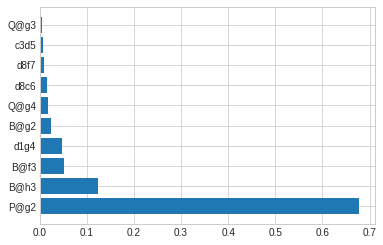

In [21]:
plot_moves_with_prob(legal_moves, p_vec_small, only_top_x=10)

### Evalution using the MCTS-Agent

for i in range(10):
    value, selected_move, confidence, idx, centipawn, depth, nodes, time_elapsed_s, nps, pv = mcts_agent.perform_action(state)
    print("selected_move", selected_move.uci())

In [22]:
l = [1,2,3,4,5]

In [23]:
np.random.randint(0, 2)

1

In [24]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = mcts_agent.evaluate_board_state(state)
print('Elapsed time: %.4fs' % (time()-t_s))

start inference thread...
self.thread_inference.isAlive() True
start inference thread...
self.thread_inference.isAlive() True
2019-04-23 22:14:43 root[12038] DEBUG Starting a brand new search tree...
info score cp -31 depth 6 nodes 145 pv P@g2 a8d8 B@g3 h4f5 g3c7 d5d4
2019-04-23 22:14:44 root[12038] DEBUG Update info
info score cp -190 depth 8 nodes 289 pv P@g2 a8d8 B@g3 h4f5 d2d4 B@a6 g1e2 P@e4
2019-04-23 22:14:44 root[12038] DEBUG Update info
info score cp -129 depth 6 nodes 433 pv B@g2 h4g2 f1g2 a8d8 N@f5 N@f4
2019-04-23 22:14:45 root[12038] DEBUG Update info
info score cp -392 depth 11 nodes 593 pv P@g2 a8d8 B@g3 h4g2 f1g2 B@e4 c3e4 d5e4 N@f5 P@f3 g1f3
2019-04-23 22:14:46 root[12038] DEBUG Update info
info score cp 127 depth 7 nodes 737 pv P@g2 a8d8 d2d4 B@a6 B@e2 a6e2 d1e2
2019-04-23 22:14:46 root[12038] DEBUG Update info
info score cp 400 depth 6 nodes 849 pv B@h3 a8d8 d1g4 P@g2 h3g2 h4g2
2019-04-23 22:14:47 root[12038] DEBUG Update info
info score cp -143 depth 5 nodes 1009 pv B

info score cp -441 depth 8 nodes 7409 pv B@h3 a8d8 P@g2 N@g5 Q@g3 h4g6 h3f5 B@e5
2019-04-23 22:15:14 root[12038] DEBUG Update info
info score cp -101 depth 10 nodes 7537 pv B@h3 a8d8 P@h6 g7h6 Q@g4 N@g6 d2d4 B@f5 g4g3 f5h3
2019-04-23 22:15:15 root[12038] DEBUG Update info
info score cp -778 depth 7 nodes 7649 pv d1g4 P@g2 g4g2 h4g2 f1g2 a8d8 Q@g3
2019-04-23 22:15:15 root[12038] DEBUG Update info
info score cp -1199 depth 3 nodes 7761 pv P@a4 P@g2 f1e1
2019-04-23 22:15:16 root[12038] DEBUG Update info
info score cp -134 depth 13 nodes 7873 pv B@g2 h4g2 d8f7 f8f7 P@e6 f7f8 P@f7 g8h8 c3d5 B@c4 d2d3 c4d5 P@h6
2019-04-23 22:15:16 root[12038] DEBUG Update info
info score cp 258 depth 17 nodes 7985 pv P@g2 f8d8 d2d4 P@h3 g1h3 P@f3 h1g1 f3g2 g1g2 h4g2 B@f3 g2h4 P@h6 h4f3 d1f3 B@e4 c3e4
2019-04-23 22:15:17 root[12038] DEBUG Update info
info score cp 2 depth 9 nodes 8097 pv B@h3 a8d8 P@g3 h4g6 d2d3 d5d4 c3e4 B@b7 g1f3
2019-04-23 22:15:17 root[12038] DEBUG Update info
info score cp 1036 depth 11 

info score cp 176 depth 27 nodes 13041 pv B@g2 a8d8 P@h6 g7h6 d1g4 N@g6 g4h4 g6h4 d2d3 P@g7 c1h6 g7h6 P@g7 g8g7 N@h5 g7g6 Q@g7 g6h5 g2f3 h4f3 g1f3 B@h3 f1e1 P@d2 f3d2 N@g2 g7g2
2019-04-23 22:15:43 root[12038] DEBUG Update info
info string move overhead is 103ms
B@g2 a8d8 P@h6 g7h6 d1g4 N@g6 g4h4 P@g7 h4a4 P@e4 N@f5 B@g4 -0.40747008472681046
P@g2 f8d8 d2d4 P@h3 B@f3 P@g4 f3d5 d8d5 d1g4 h3g2 f1e1 -0.7860183119773865
B@h3 a8d8 P@h6 g7h6 d1g4 N@g6 g4h4 g6h4 d2d4 B@c4 N@d3 P@g7 c1h6 g7h6 -0.46504367887973785
2019-04-23 22:15:44 root[12038] INFO info string score cp -287 depth 28 nodes 13121 time 60114 nps 218 pv B@g2 a8d8 P@h6 g7h6 d1g4 N@g6 g4h4 P@g7 h4a4 P@e4 N@f5 B@g4 f5e7 g6e7 a4a7 P@f3 a7b8
Elapsed time: 60.1175s


In [25]:
mcts_agent.root_node.child_number_visits.argmax()

38

In [26]:
mcts_agent.root_node.q_value.argmax()

53

In [27]:
from DeepCrazyhouse.src.domain.agent.player.alpha_beta_agent import AlphaBetaAgent

In [28]:
# minimax(currentPosition, 3, -∞, +∞, true)

In [29]:
ab_agent = AlphaBetaAgent(net=nets[0], depth=4, nb_candidate_moves=10, include_check_moves=False)

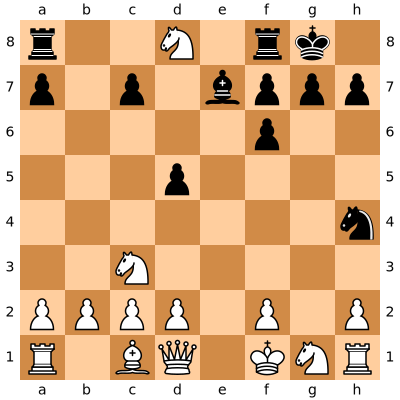

In [30]:
state.board

In [31]:
ab_agent.best_moves

[None, None, None, None]

In [32]:
ab_agent.best_moves

[None, None, None, None]

In [33]:
d = np.array([4,3,2,1])

In [34]:
np.argsort(d)[::-1][:2]

array([0, 1])

In [35]:
[2,3] + [3,4]

[2, 3, 3, 4]

In [36]:
l = [1,2,3]

In [37]:
l[:-1]

[1, 2]

In [38]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = ab_agent.evaluate_board_state(
    state) #, depth=5)
print('Elapsed time: %.4fs' % (time()-t_s))

2019-04-23 22:15:44 root[12038] INFO [Move.from_uci('B@h3'), Move.from_uci('a8d8'), Move.from_uci('d1g4'), Move.from_uci('h4g6')]
2019-04-23 22:15:44 root[12038] INFO Value: [-0.04915881], Centipawn: [-27.647978]
Elapsed time: 0.1704s


In [39]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = ab_agent.evaluate_board_state(
    state)
print('Elapsed time: %.4fs' % (time()-t_s))

2019-04-23 22:15:44 root[12038] INFO [Move.from_uci('B@h3'), Move.from_uci('a8d8'), Move.from_uci('d1g4'), Move.from_uci('h4g6')]
2019-04-23 22:15:44 root[12038] INFO Value: [-0.04915881], Centipawn: [-27.647978]
Elapsed time: 0.1639s


In [40]:
ab_agent.best_moves

[Move.from_uci('B@h3'),
 Move.from_uci('a8d8'),
 Move.from_uci('d1g4'),
 Move.from_uci('h4g6')]

In [41]:
mcts_agent.root_node.n_sum

13121

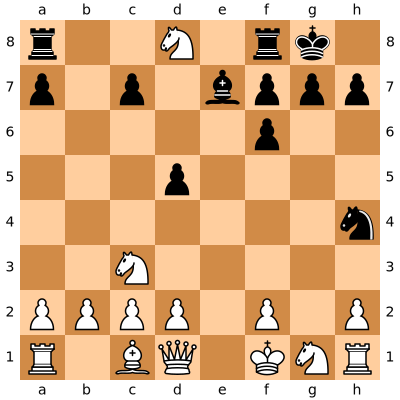

In [42]:
board

In [43]:
for i, child_node in enumerate(mcts_agent.root_node.child_nodes):
    if child_node.initial_value < 0:
        print(legal_moves[i], child_node.initial_value)

AttributeError: 'NoneType' object has no attribute 'initial_value'

In [ ]:
mcts_agent.root_node.legal_moves[mcts_agent.root_node.child_number_visits.argmax()]

In [ ]:
mcts_agent.root_node.legal_moves[mcts_agent.root_node.q_value.argmax()]

In [ ]:
pb_c_base = 19652 / 10
pb_c_init = 3.6
import math
cpuct = math.log((3000 + pb_c_base + 1) / pb_c_base) + pb_c_init

In [ ]:
cpuct

In [ ]:
#c = (a * b ) + (0.3 * a + 0.7 * b)

In [ ]:
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

In [ ]:
mcts_agent.get_last_q_values(min_nb_visits=10)

In [ ]:
np.sort(mcts_agent.root_node.child_number_visits)[::-1][:100]

In [ ]:
plot_moves_with_prob(legal_moves, mcts_agent.root_node.child_number_visits, only_top_x=20)

In [ ]:
plot_moves_with_prob(legal_moves, mcts_agent.root_node.q_value, only_top_x=4)

In [ ]:
plot_moves_with_prob(legal_moves, p_vec_small, only_top_x=10)

In [ ]:
plot_moves_with_prob(legal_moves, p_vec_small, only_top_x=10)

In [ ]:


%load_ext line_profiler
r = %lprun -r -f mcts_agent._run_single_playout mcts_agent._run_single_playout(mcts_agent.root_node)
r.print_stats()



In [ ]:
from DeepCrazyhouse.src.domain.crazyhouse.input_representation import board_to_planes


In [ ]:
%load_ext line_profiler
r = %lprun -r -f board_to_planes board_to_planes(board)
r.print_stats()

In [ ]:
%load_ext line_profiler
r = %lprun -r -f board_to_planes board_to_planes(board)
r.print_stats()